In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [ ]:
df.shape

(43427, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43427 entries, 0 to 43426
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43427 non-null  int64  
 1   name                            43411 non-null  object 
 2   host_id                         43426 non-null  float64
 3   host_name                       43405 non-null  object 
 4   neighbourhood_group             43426 non-null  object 
 5   neighbourhood                   43426 non-null  object 
 6   latitude                        43426 non-null  float64
 7   longitude                       43426 non-null  float64
 8   room_type                       43426 non-null  object 
 9   price                           43426 non-null  float64
 10  minimum_nights                  43426 non-null  float64
 11  number_of_reviews               43426 non-null  float64
 12  last_review                     

In [ ]:
print(df.dtypes)

id                                  int64
name                               object
host_id                           float64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object


In [ ]:
# Step 4: Check for Missing Values
print("\n❌ Missing Values Per Column:")
print(df.isnull().sum())


❌ Missing Values Per Column:
id                                   0
name                                16
host_id                              1
host_name                           22
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       7374
reviews_per_month                 7374
calculated_host_listings_count       1
availability_365                     1
dtype: int64


In [ ]:
# Step 5: Handle Missing Values
# Fill missing 'reviews_per_month' with 0 (assuming no reviews)
df["reviews_per_month"].fillna(0, inplace=True)

<ipython-input-27-807dfc2476c1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)


In [ ]:
# Drop rows with missing values in 'name' or 'host_name' (these are crucial)
df.dropna(subset=["name", "host_name"], inplace=True)

In [ ]:
# Step 6: Check for Duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate Rows Found: {duplicates}")


🔍 Duplicate Rows Found: 0


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Step 7: Standardization (Ensure column names are consistent)
df.columns = df.columns.str.lower().str.replace(" ", "_")  # Convert to lowercase & replace spaces with underscores

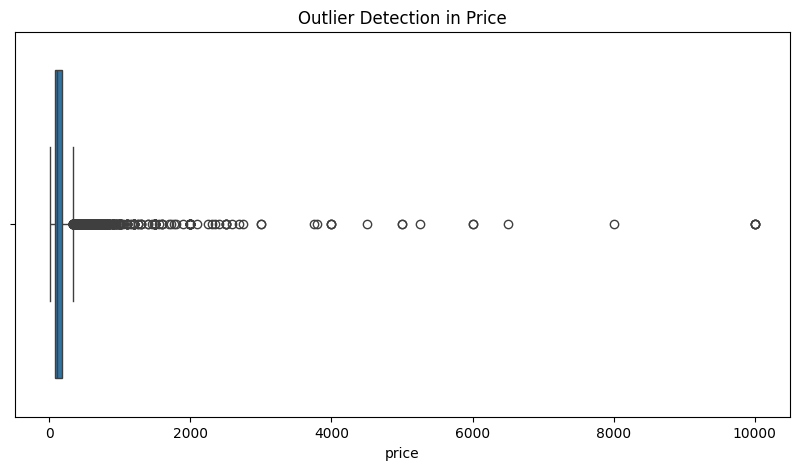

In [ ]:
# Step 8: Outlier Detection & Handling (Price column)
plt.figure(figsize=(10,5))
sns.boxplot(x=df["price"])
plt.title("Outlier Detection in Price")
plt.show()

In [ ]:
# Remove extreme price outliers (e.g., prices over $1000 may be unrealistic)
df = df[df["price"] <= 1000]

<ipython-input-14-b529724c664d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["room_type"], palette="coolwarm")


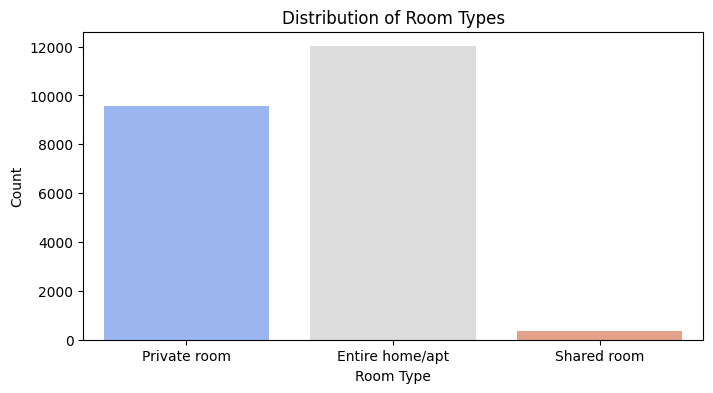

In [ ]:
# Step 9: Exploratory Data Analysis (EDA)
# Distribution of room types
plt.figure(figsize=(8,4))
sns.countplot(x=df["room_type"], palette="coolwarm")
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

<ipython-input-15-55210a63f9d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette="magma")


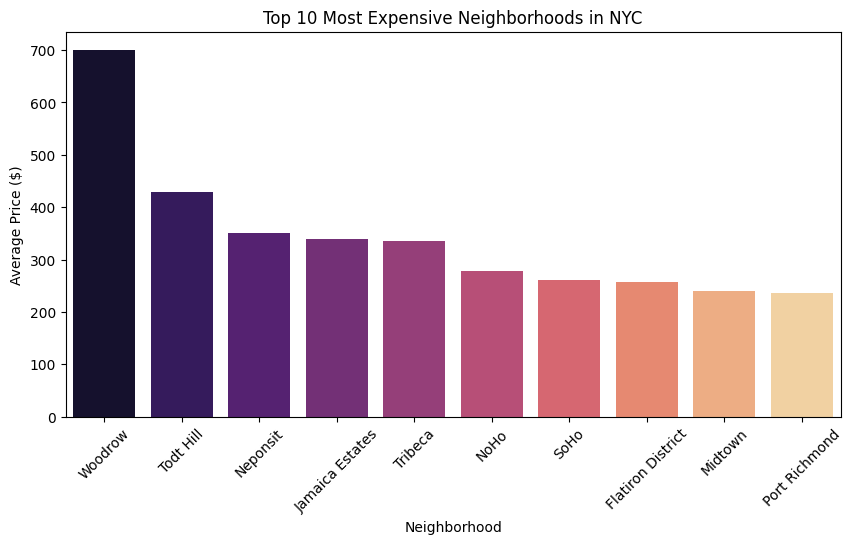

In [ ]:
# Top 10 most expensive neighborhoods
top_neighborhoods = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Most Expensive Neighborhoods in NYC")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price ($)")
plt.show()